In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![](https://media.istockphoto.com/id/1265448899/tr/foto%C4%9Fraf/biyometrik-do%C4%9Frulama-ve-y%C3%BCz-alg%C4%B1lama.jpg?s=612x612&w=0&k=20&c=oTqGrKCfDATsWa4Kku_ETnCyeTvyJtJp6CTXKHNGqoQ=)

# Introduction

Hello everyone,

I created this project by following the this [project](https://youtube.com/playlist?list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc&si=fLHnRNhDeBc1dvFl) series and wanted to share it with you. I hope you can benefit from reading it.
Since adding our original visual dataset directly to the project would increase the size of the project, I pulled it from the project's original git.hub repository.

I would like to tell you in general what we did in the steps, one by one. First, we included our images in the project and visualized our sample image.

Then we framed the face part from the picture and identified the eye objects within the frame. Then, we defined a function that cuts the face area in the image and saves it to a different file.

Then, we applied Wavelet transformation to these cut images to recognize the features more easily. And we combined the transformed and original images.

Then we moved on to the modeling phase. First, we created a pipeline for the SVC model. We evaluated the first model we created with SVC. And we moved on to the Hyperparameter step. In this step, we tried to find the best model and parameters among the parameters we gave with 3 different models(SVM,RandomForestClassifier,LogisticRegression).

Finally, by evaluating the model scores, we chose the SVM model as the best model.

Enjoyable reading.

-------------

Herkese merhaba, 

Bu projemi bu [proje](https://youtube.com/playlist?list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc&si=fLHnRNhDeBc1dvFl) serisini takip ederek oluşturdum ve sizlerle paylaşmak istedim. Umarım okurken faydalanbilirsiniz.
Orjinal görsel veri setimizi direk projeye eklemek projenin boyutunu arttıracağı için projenin orjinal git.hub repositorysinden çektim.

Adımlarda genel olarak neler yaptık size sırasıyla anlatmak isterim. Ilk önce görsellerimizi projeye dahil ettik ve örnek resmimizi görselleştirdik.

Daha sonra resimden yüz kısmını çerçeve içine aldık ve çerçeve içinden göz nesnelerini belirledik. Daha sonra resimdeki yüz bolgesini keserek farklı bir dosyaya kaydeden bir fonksiyon tanımladık.

Daha sonra ise bu kesilmiş resimlere özellikleri daha rahat tanıyabilmek için Wavelete dönüşümü uyguladık. Ve dönüştürülmüş ve orjinal görselleri birleştirdik.

Daha sonra modelleme aşamasına geçtik. ilk olarak SVC modeli için pipeline oluşturduk. SVC ile oluşturuduğumuz ilk modeli değerlendirdik. Ve Hyperparameter adımına geçtik. Bu adımda 3 farklı model(SVM,RandomForestClassifier,LogisticRegression) ile verdiğimiz parametreler içinden en iyi modeli ve parametreleri bulmaya çalıştık.

En son olarak model skorlarını değerlendirerek, en iyi model olarak SVM modelini seçtik.

Keyifli okumalar.

# Content
* [<font size=4>Loading images</font>](#1)
* [<font size=4>Determining Face Matrix</font>](#2)
* [<font size=4>Drawing Face and Eyes Rectangle</font>](#3)
    * [Defining Function for Cropped Face](#3.1)
         * [Checking if 2 Eyes doesn't Seem ](#3.1.1)
* [<font size=4>Croppign Images and Writing in New Folder</font>](#4)         
* [<font size=4>Feature Engineering</font>](#5)
    * [Preprocessing: Use "Wavelete Transform method for feature extraction](#5.1)
    * [Plotting Transformed Image Data](#5.2)
    * [Combining Tranformed and Cropped images](#5.3)


* [<font size=4>Modelling</font>](#6) 
     * [Pipeline](#6.1)
     * [SVC Model Evaluation](#6.2)
     * [Hyperparameter Tuning with GridSearch ](#6.3)
         * [Looking into Best models and Parameters from Tuning](#6.3.1)
         * [Getting Test Dataset scores from Tuning models ](#6.3.2)
     * [Choosing Best Model](#6.4)    
         * [Plotting Confusion Matrix for Best Model](#6.4.1)
         

In [26]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Loading images <a id="1"></a>

In [27]:
img=cv2.imread("/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/maria_sharapova/183821-Maria_Sharapova-blonde-women-athletes-smiling-748x997.jpg")
img.shape
# as we can see its 3 dimension array

(997, 748, 3)

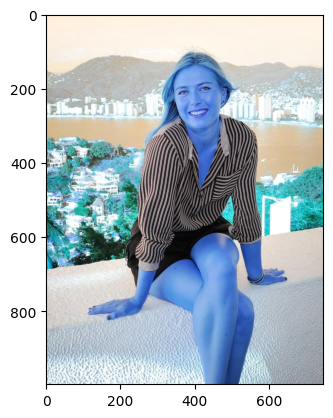

In [28]:
plt.imshow(img)

In [29]:
# so lets get in 2 dimensions(without RGB(colour) dimension)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(997, 748)

In [30]:
gray

array([[235, 235, 235, ..., 240, 240, 240],
       [235, 235, 235, ..., 240, 240, 240],
       [235, 235, 235, ..., 240, 240, 240],
       ...,
       [248, 246, 253, ..., 136, 140, 143],
       [236, 232, 244, ..., 147, 146, 145],
       [232, 212, 225, ..., 148, 146, 146]], dtype=uint8)

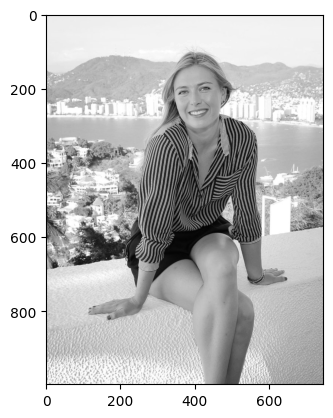

In [31]:
plt.imshow(gray,cmap="gray")

# Determining Face Matrix <a id="2"></a> 

In [32]:
# recognizing the face arrays in image
face_cascade = cv2.CascadeClassifier('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[330, 154, 138, 138]], dtype=int32)

In [33]:
(x,y,w,h) = faces[0]
x,y,w,h

(330, 154, 138, 138)

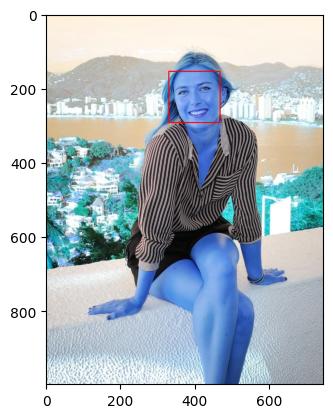

In [34]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # (255,0,0) its for rgb (color code)
plt.imshow(face_img)

# Drawing Face and Eyes Rectangle<a id="3"></a> 

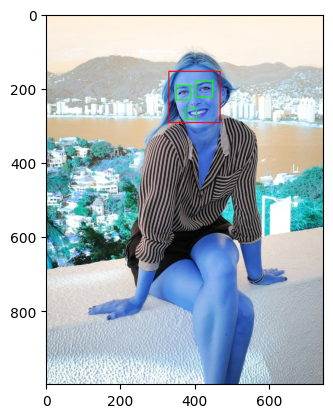

In [35]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

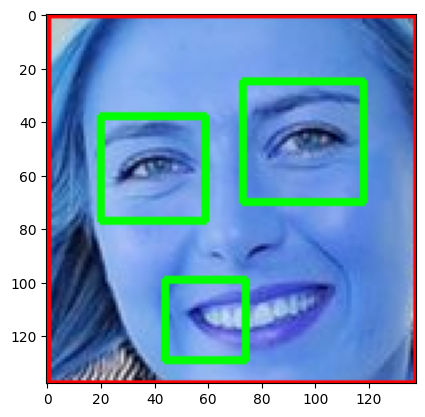

In [36]:
plt.imshow(roi_color, cmap='gray')

## Defining Function for Cropped Face <a id="3.1"></a> 

In [37]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

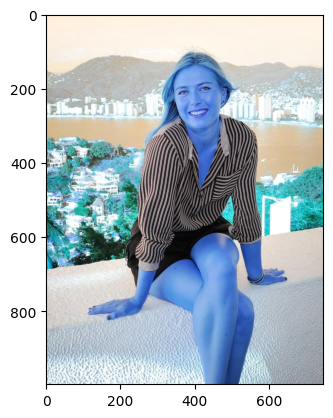

In [38]:
original_image = cv2.imread('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/maria_sharapova/183821-Maria_Sharapova-blonde-women-athletes-smiling-748x997.jpg')
plt.imshow(original_image)

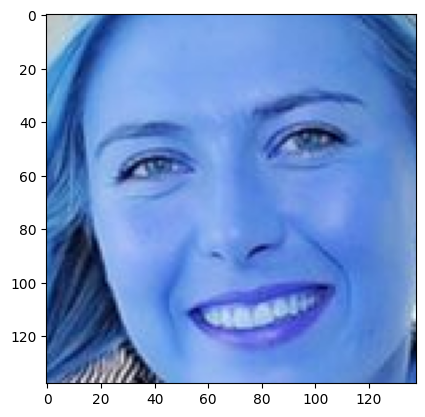

In [39]:
cropped_image = get_cropped_image_if_2_eyes('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/maria_sharapova/183821-Maria_Sharapova-blonde-women-athletes-smiling-748x997.jpg')
plt.imshow(cropped_image)

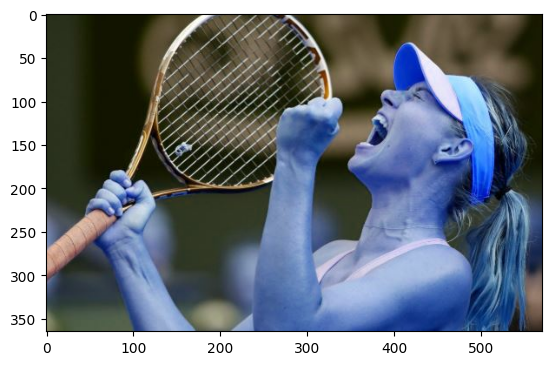

In [40]:

org_image_obstructed = cv2.imread('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
plt.imshow(org_image_obstructed)


### Checking if 2 Eyes doesn't Seem <a id="3.1.1"></a> 

In [41]:
# we wanna see modified function if image is not clear with 2 eyes 
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/test_images/sharapova2.JPG')
cropped_image_no_2_eyes
#we got nothing because there is no 2 eyes on photo

# Croppign Images and Writing in New Folder <a id="4"></a> 

In [42]:
# If you would like to create your own cropped file, you can use these code

path_to_data = "/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/images_dataset" # I'll get file names for cropped datasets
path_to_cr_data = "/kaggle/working/cropped/" 
# As you know We're getting our dataset from github repository. And also that repository has cropped image file. 
# But I wanted to show you how we can create our own folder for nex projects.


img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


# this code will check if we dosent have file with that(path_to_cr_data) way 
# And if we have that folder it will delete it and than will create with exactly same way
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) # this delete the folder
        
os.mkdir(path_to_cr_data) # it create a folder in that way




#image Directory

cropped_image_dirs = []
celebrity_file_names_dict = {} # it gonna keep all file names in dictionary


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # it takes player names from file path's last element
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = [] # we are creating a key , and than below_code_1 we'll add values for dictionary(for key-value structure)
    
    for entry in os.scandir(img_dir):  #it will take all images by one by from img_dir file
        roi_color = get_cropped_image_if_2_eyes(entry.path)  # we getting cropped images with our function if our image has 2 eyes,if not function was returning nothing
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name # getting file way for each celebrity name in cropped folder
            if not os.path.exists(cropped_folder): # checking if not file is exist,it'll create file 
                os.makedirs(cropped_folder) #makedirs creates all directories that are part of path and do not yet exist. mkdir creates only the rightmost directory of path.
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png" #creating file name for cropped image
            cropped_file_path = cropped_folder + "/" + cropped_file_name # file way for cropped image 
            
            cv2.imwrite(cropped_file_path, roi_color)  # writing my cropped image in folder with opencv image write function
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #below_code_1
            count += 1    


#After creating this cropped image file, normally it clean dataset from outliers manually but in kaggle ı needs to do by one by, so ı'll use ready dataset from tutor

roger_federer
Generating cropped images in folder:  /kaggle/working/cropped/roger_federer
serena_williams
Generating cropped images in folder:  /kaggle/working/cropped/serena_williams
lionel_messi
Generating cropped images in folder:  /kaggle/working/cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  /kaggle/working/cropped/virat_kohli
maria_sharapova
Generating cropped images in folder:  /kaggle/working/cropped/maria_sharapova


After creating this cropped image file, normally it clean dataset from outliers manually but in kaggle ı needs to do by one by, so ı'll use ready dataset from tutor 

# Feature Engineering <a id="5"></a> 

### Preprocessing: Use "Wavelete Transform method for feature extraction  <a id="5.1"></a> 

In [43]:
# there are some other feature extraction techinques but most common we will use
#Wavelet transform

import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to gray scale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

### Plotting Transformed Image Data <a id="5.2"></a> 

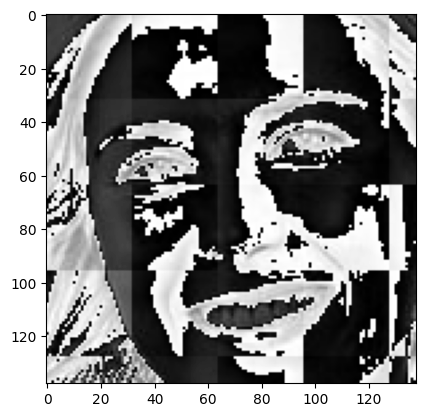

In [44]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

**You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier**

In [45]:
cropped_image_dirs

['/kaggle/working/cropped/roger_federer',
 '/kaggle/working/cropped/serena_williams',
 '/kaggle/working/cropped/lionel_messi',
 '/kaggle/working/cropped/virat_kohli',
 '/kaggle/working/cropped/maria_sharapova']

In [46]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'roger_federer': 0,
 'serena_williams': 1,
 'lionel_messi': 2,
 'virat_kohli': 3,
 'maria_sharapova': 4}

In [47]:
# we deleted some images manually so we needs to get all file names againg. And we needs to give way from tutors repository.
# Because it's cleaned and ready use for our model. 
cropped_image_dirs=['/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/cropped/roger_federer',
 '/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/cropped/serena_williams',
 '/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/cropped/lionel_messi',
 '/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/cropped/virat_kohli',
 '/kaggle/input/celebretiyimages/DataScience/CelebrityFaceRecognition/model/dataset/cropped/maria_sharapova']
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

Images in cropped file can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Now,let's prepare X and y.

### Combining Tranformed and Cropped images <a id="5.3"></a> 

In [48]:
# we wavelet transform for every image in folder and than we combined with original data (with 32*32 size) and than we assign in x and y target
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [49]:
len(X)
#thats mean we have 168 image we have

168

In [50]:
print((32*32*3)+(32*32)) #first pharantes from colorfully image whic is originial images in color second paranthesis from wavelet image which is in white-black
len(X[0])
# thats mean every image has 4096 feature has every image

4096


4096

In [51]:
#it's just converting the float type for avoiding getting errror from model
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

# Modelling <a id="6"></a> 
Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Pipeline <a id="6.1"></a> 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10) #default test size =0,25

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) # first it standartise our data then it'll apply given model
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

## SVC Model Evaluation <a id="6.2"></a> 

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5
           2       1.00      0.82      0.90        11
           3       0.85      1.00      0.92        11
           4       0.88      0.88      0.88         8

    accuracy                           0.86        42
   macro avg       0.84      0.84      0.84        42
weighted avg       0.87      0.86      0.86        42



## Hyperparameter Tuning  with GridSearch <a id="6.3"></a> 

### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.857538,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.675077,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.873231,{'logisticregression__C': 1}


### Looking into Best models and Parameters from Tuning  <a id="6.3.1"></a> 

In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### Getting Test Dataset scores from Tuning models <a id="6.3.2"></a> 

In [59]:
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [60]:
best_estimators['random_forest'].score(X_test,y_test)

0.7619047619047619

In [61]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8809523809523809

## Choosing Best Model <a id="6.4"></a> 

In [62]:
# we choose "svm" model as a best classification model. Because when we compare test dataset scores "svm" is given best score.
best_clf = best_estimators['svm']

### Plotting Confusion Matrix for Best Model <a id="6.4.1"></a> 

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  0,  1],
       [ 1,  4,  0,  0,  0],
       [ 0,  0, 10,  1,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  1,  0,  0,  7]])

Text(95.72222222222221, 0.5, 'Truth')

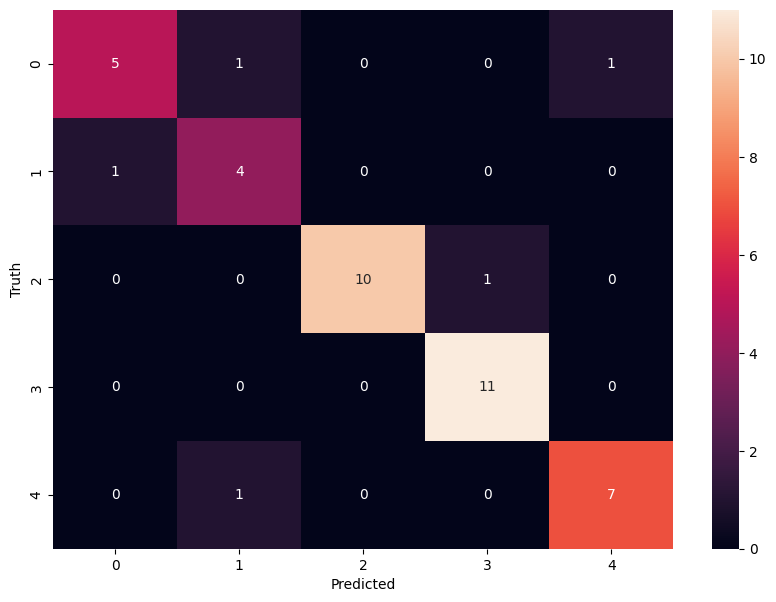

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
import joblib
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [66]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))